# Exercise 7 - Cluster 

Using the dataset in EFIplu_medit.zip:

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv(os.getcwd() + '\..\..\Examples\EFIplus_medit.zip', compression='zip', sep=";")

## 7.1.
Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

In [37]:
# subset the df
# filter by Tejo and Douro basin
df.query('Catchment_name == "Douro"' or 'Catchment_name = "Tejo"')

# choose the columns that contain environmental variables
columns = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]
df = df.dropna()
df = df.reset_index()
df.head()

,index,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,0,199,0.001,700.840807,522.071164,17.6,8.5,28.1
1,1,1253,13.406,1603.519424,640.327779,9.3,0.6,18.9
2,2,1155,9.398,1578.678579,633.238847,10.1,1.2,19.6
3,3,1074,8.186,1553.219128,625.841858,10.1,1.2,19.5
4,4,1018,11.736,1539.684999,622.111415,10.3,1.7,20.0


In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='manhattan', # equivalent to 'cityblock'
                                    linkage='average')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='euclidean', # equivalent to 'cityblock'
                                    linkage='ward')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='euclidean', # equivalent to 'cityblock'
                                    linkage='single')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='euclidean', # equivalent to 'cityblock'
                                    linkage='complete')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)


## 7.2.
Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage 

c:\Users\johan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


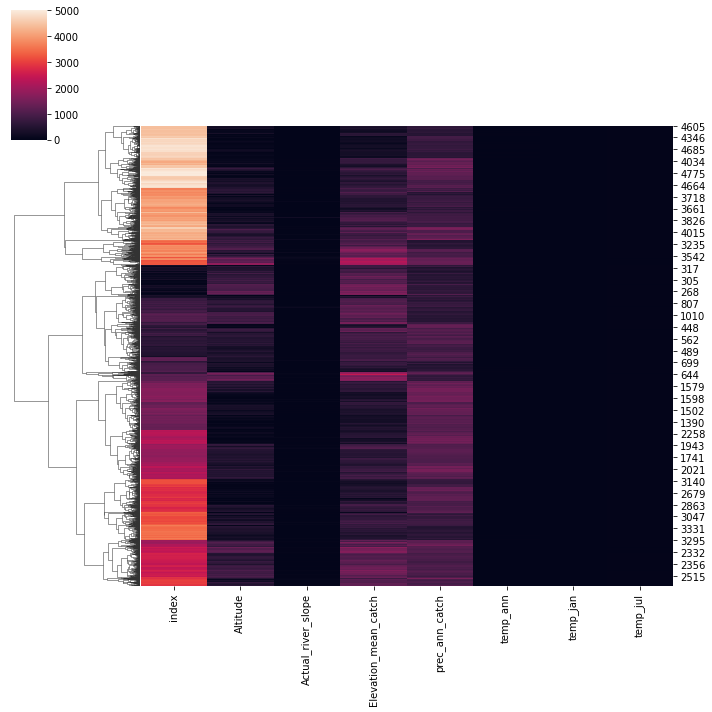

In [31]:
import seaborn as sns
sns.clustermap(df, col_cluster=False, row_cluster=True, method='average')